/home/misha-sh/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


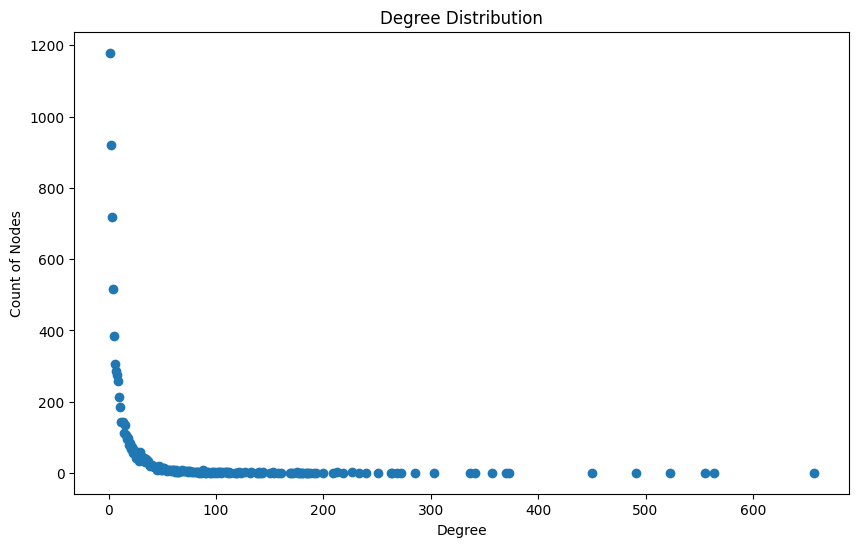

Nodes count: 7583
Edges count: 51138


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from find_optimal import (bfs_with_edge_limit_and_subgraph,convert_to_directed_with_probability, calculate_bidirectional_percentage,
      calc, calc_degree_distribution, calc_clustering_distribution, plot_clustering_coefficient, plot_degree_distribution,
      calc_graph_numbers, compare_graph_numbers)

G = nx.read_edgelist('edges_visited.txt', create_using=nx.DiGraph(), nodetype=str)
plot_degree_distribution(G, use_log=False)

print("Nodes count:", G.number_of_nodes())
print("Edges count:", G.number_of_edges())

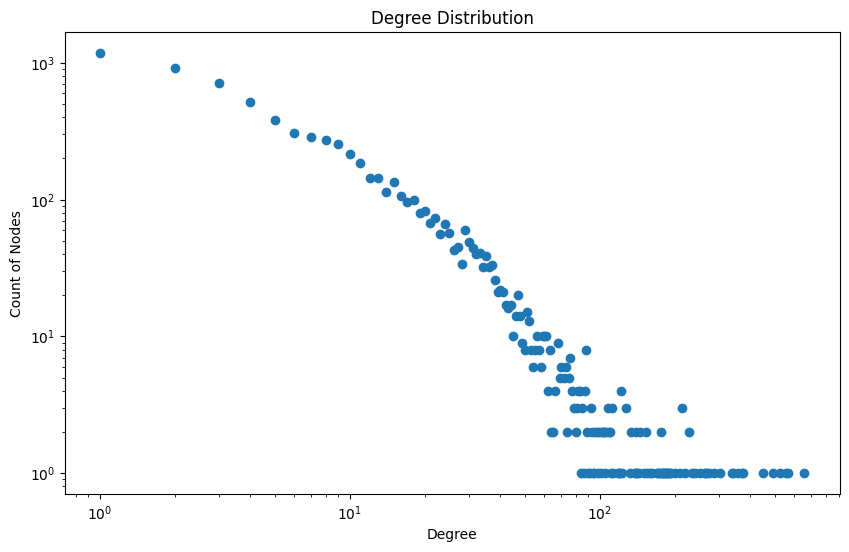

In [2]:
plot_degree_distribution(G, use_log=True)

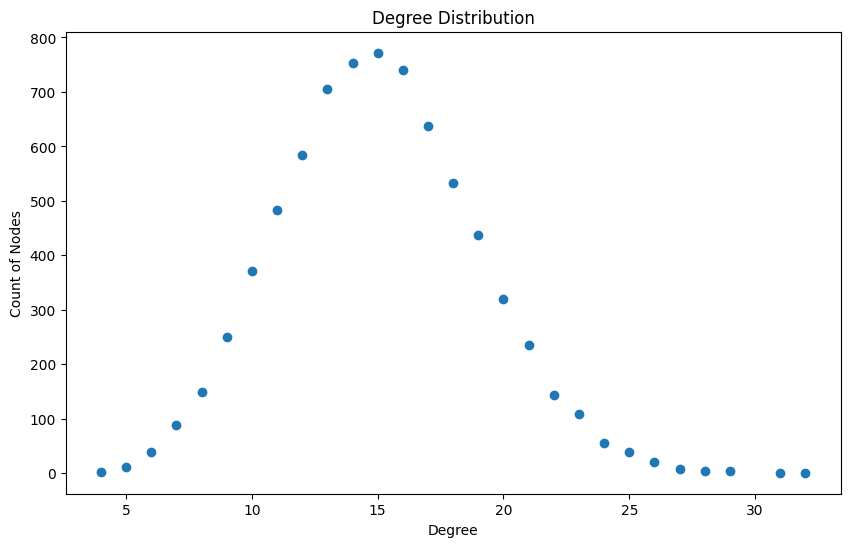

Nodes count: 7500
Edges count: 56322


In [3]:
n = 7500
p = 0.002

er_graph = nx.erdos_renyi_graph(n, p)
plot_degree_distribution(er_graph, use_log=False)
print("Nodes count:", er_graph.number_of_nodes())
print("Edges count:", er_graph.number_of_edges())

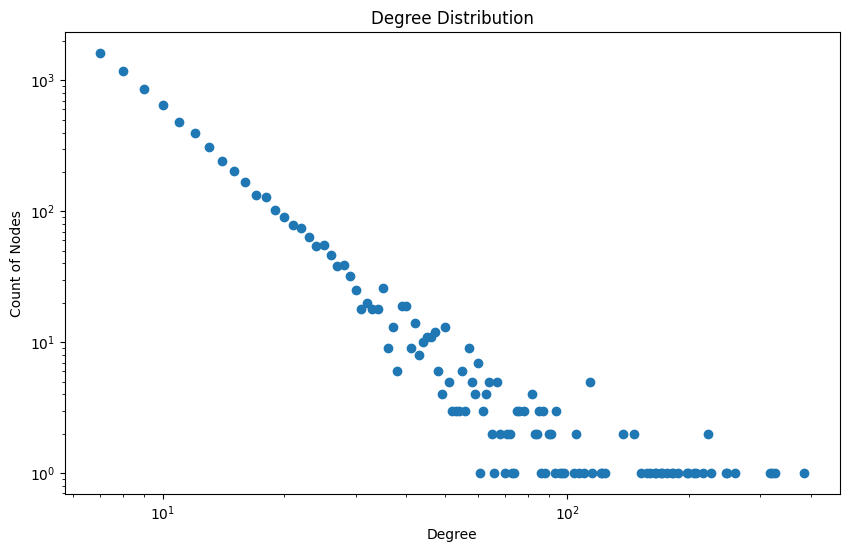

Nodes count: 7500
Edges count: 52451


In [4]:
n = 7500
m = 7
ba_graph = nx.barabasi_albert_graph(n, m)
plot_degree_distribution(ba_graph)
print("Nodes count:", ba_graph.number_of_nodes())
print("Edges count:", ba_graph.number_of_edges())

Average Clustering Coefficient: 0.11503942126974954


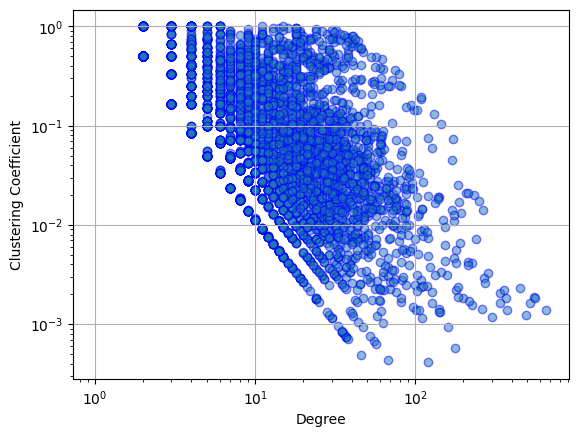

In [5]:
clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {clustering_coefficient}")
plot_clustering_coefficient(G, "Clustering Coefficient vs Degree (G)")

Average Clustering Coefficient: 0.010554650540722814


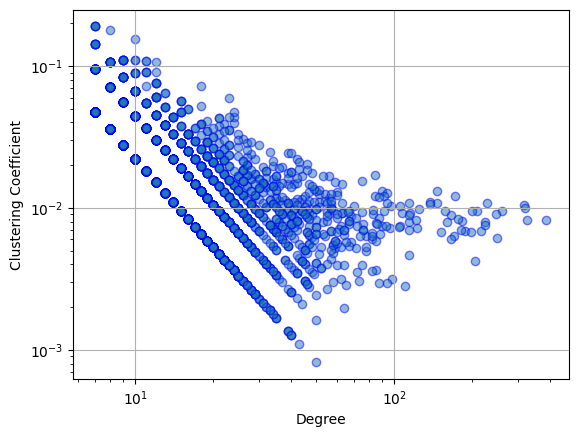

In [6]:
clustering_coefficient = nx.average_clustering(ba_graph)
print(f"Average Clustering Coefficient: {clustering_coefficient}")
plot_clustering_coefficient(ba_graph, "Clustering Coefficient vs Degree (ba)")

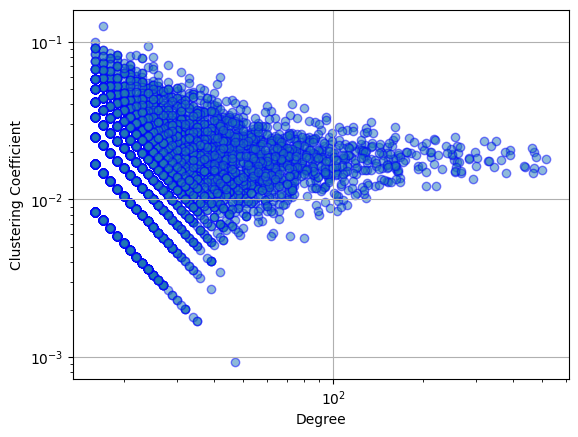

In [7]:
n = 7000
m = 16
ba_graph = nx.barabasi_albert_graph(n,m)
plot_clustering_coefficient(ba_graph, "Clustering Coefficient vs Degree (ba)")

In [8]:
calculate_bidirectional_percentage(G)

0.08148539246744105

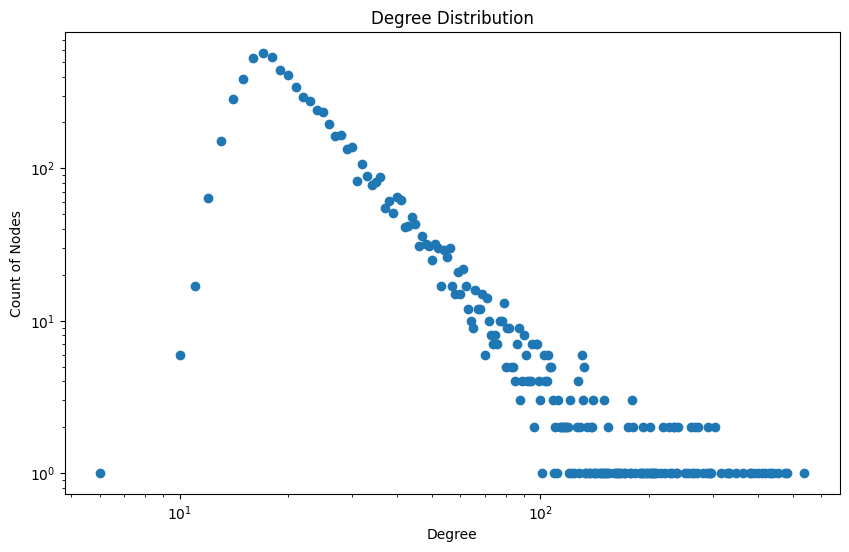

Nodes count: 7500
Edges count: 115198


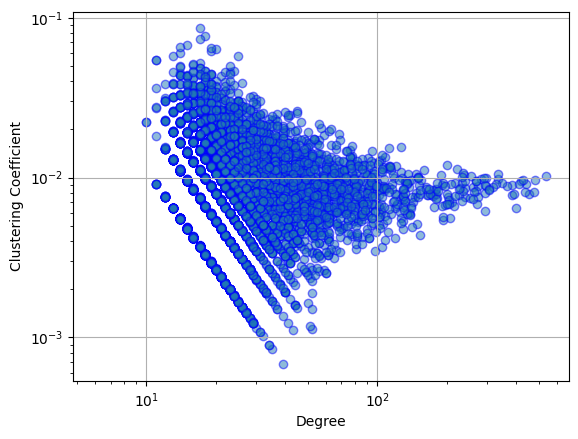

In [9]:
n = 8000
m = 16
ba_graph = nx.barabasi_albert_graph(n,m)
ba_graph = convert_to_directed_with_probability(ba_graph, 1 - calculate_bidirectional_percentage(G), 0.1)
ba_graph = bfs_with_edge_limit_and_subgraph(ba_graph, 1, 7500)

plot_degree_distribution(ba_graph)
print("Nodes count:", ba_graph.number_of_nodes())
print("Edges count:", ba_graph.number_of_edges())

plot_clustering_coefficient(ba_graph, "Clustering Coefficient vs Degree (ba)")

In [10]:
n = 8000
m = 7
ba_graph = nx.barabasi_albert_graph(n,m)
ba_graph = convert_to_directed_with_probability(ba_graph, 1 - calculate_bidirectional_percentage(G), 0.1)
ba_graph = bfs_with_edge_limit_and_subgraph(ba_graph, 1, 7500)

In [11]:
import json

with open("target.json", 'w') as target_file:
  target = calc_graph_numbers(G)
  json.dump(target, target_file)

estimation = calc_graph_numbers(ba_graph)
print(target)
print(estimation)
compare_graph_numbers(target, estimation, {
    'number_of_nodes': 1.,
    'number_of_edges': 0.1,
    'degree_distribution': 1000.,
    'clustering_distribution': 0.1,
    'bidirectional': 10000000.,
    'connected': 0.001,
})

{'number_of_nodes': 7583, 'number_of_edges': 51138, 'degree_distribution': [3.322219294733919, 3.092018470752797, 3.178401341533755, 3.1658376246901283, 2.9590413923210934, 2.4409090820652177, 1.8573324964312685, 1.2787536009528289, 0.7781512503836436], 'clustering_distribution': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 243.0], [0.0, 0.0, 0.0, 0.0, 0.0, 87.0, 172.0, 132.0, 212.0], [0.0, 0.0, 0.0, 66.0, 147.0, 270.0, 275.0, 198.0, 133.0], [0.0, 25.0, 142.0, 179.0, 285.0, 257.0, 189.0, 136.0, 94.0], [16.0, 52.0, 95.0, 154.0, 202.0, 158.0, 77.0, 53.0, 54.0], [11.0, 29.0, 35.0, 65.0, 63.0, 36.0, 10.0, 16.0, 4.0], [11.0, 15.0, 12.0, 18.0, 4.0, 3.0, 5.0, 0.0, 0.0], [8.0, 6.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'bidirectional': 0.08148539246744105, 'connected': 3874}
{'number_of_nodes': 7500, 'number_of_edges': 50640, 'degree_distribution': [0.0, 1.7323937598229686, 3.580582876814367, 3.4551495211798278, 2.7752462597402365, 2.1760912590556813,

{'total': 140605.4645749852,
 'number_of_nodes': 6889.0,
 'number_of_edges': 24800.4,
 'degree_distribution': 13971.048439393915,
 'clustering_distribution': 80089.5,
 'bidirectional': 293.66013559130414,
 'connected': 14561.856}

In [12]:
best = calc(**{'n': 12020, 'm': 21, 'p1': 0.9087905851289715, 'p2': 0.6782910907846817, 'ppwerlaw_p': 0.8542483023982489, 'graph_type': 'barabasi_albert', 'dba_m2': 7, 'dba_p2': 0.3981708156479521})
estimation = calc_graph_numbers(best)
print(target)
print(estimation)
compare_graph_numbers(target, estimation, {
    'number_of_nodes': 1.,
    'number_of_edges': 0.1,
    'degree_distribution': 1000.,
    'clustering_distribution': 0.1,
    'bidirectional': 10000000.,
    'connected': 0.001,
})

{'number_of_nodes': 7583, 'number_of_edges': 51138, 'degree_distribution': [3.322219294733919, 3.092018470752797, 3.178401341533755, 3.1658376246901283, 2.9590413923210934, 2.4409090820652177, 1.8573324964312685, 1.2787536009528289, 0.7781512503836436], 'clustering_distribution': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 243.0], [0.0, 0.0, 0.0, 0.0, 0.0, 87.0, 172.0, 132.0, 212.0], [0.0, 0.0, 0.0, 66.0, 147.0, 270.0, 275.0, 198.0, 133.0], [0.0, 25.0, 142.0, 179.0, 285.0, 257.0, 189.0, 136.0, 94.0], [16.0, 52.0, 95.0, 154.0, 202.0, 158.0, 77.0, 53.0, 54.0], [11.0, 29.0, 35.0, 65.0, 63.0, 36.0, 10.0, 16.0, 4.0], [11.0, 15.0, 12.0, 18.0, 4.0, 3.0, 5.0, 0.0, 0.0], [8.0, 6.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], 'bidirectional': 0.08148539246744105, 'connected': 3874}
{'number_of_nodes': 7583, 'number_of_edges': 51407, 'degree_distribution': [1.7242758696007892, 2.6503075231319366, 3.5224442335063197, 3.4631461367263494, 2.8068580295188172, 2.1

{'total': 104536.2428186829,
 'number_of_nodes': 0.0,
 'number_of_edges': 7236.1,
 'degree_distribution': 3805.514041513793,
 'clustering_distribution': 79682.90000000001,
 'bidirectional': 32.78477716909459,
 'connected': 13778.944}

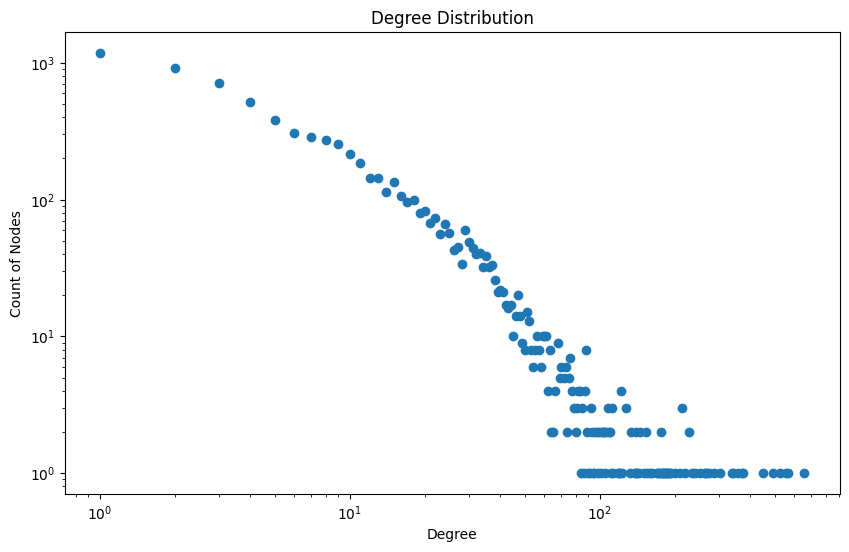

Nodes count: 7583
Edges count: 51138


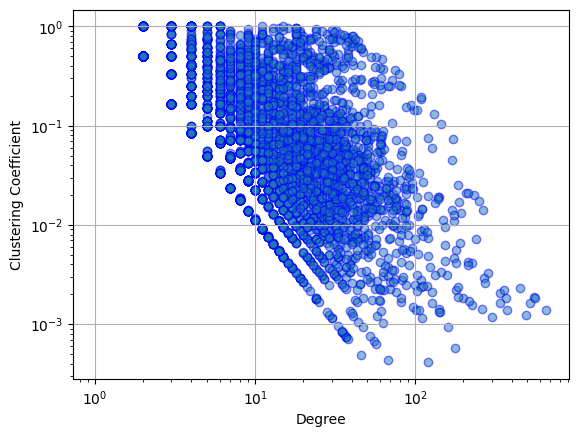

In [13]:

plot_degree_distribution(G)
print("Nodes count:", G.number_of_nodes())
print("Edges count:", G.number_of_edges())
plot_clustering_coefficient(G, "Clustering Coefficient vs Degree (G)")

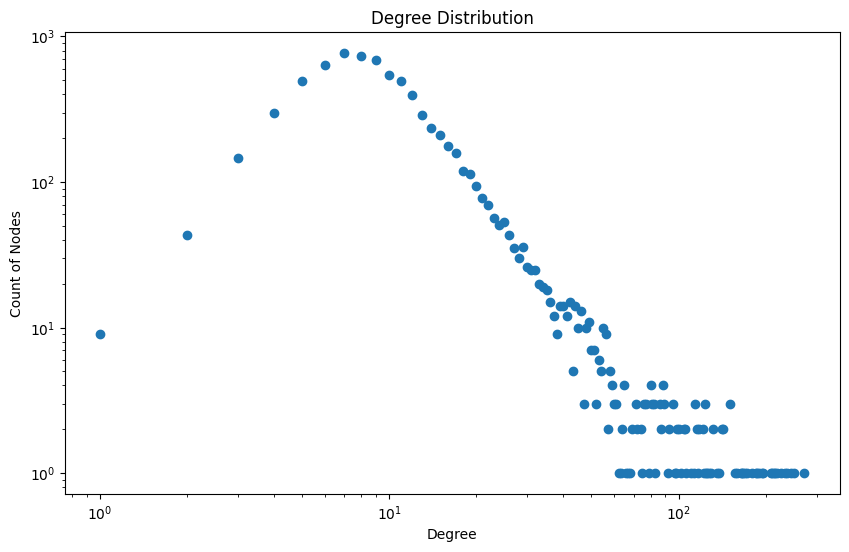

Nodes count: 7583
Edges count: 51407


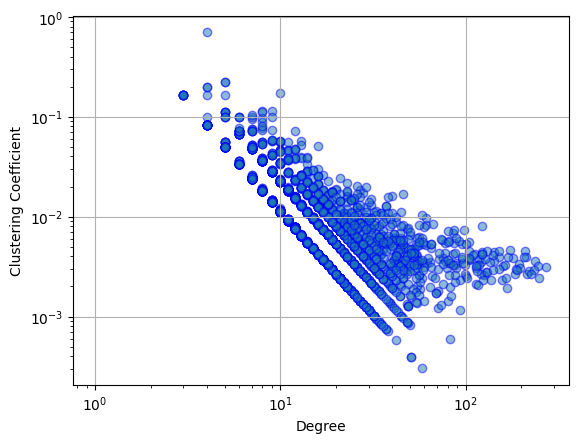

In [14]:

plot_degree_distribution(best)
print("Nodes count:", best.number_of_nodes())
print("Edges count:", best.number_of_edges())
plot_clustering_coefficient(best, "Clustering Coefficient vs Degree (best)")